# Load datasets

In [1]:
from bs4 import BeautifulSoup
from collections import defaultdict
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [4]:
filesuffix1='with_topics_LDA_2024-12-29'
filesuffix2='dov2vec_kmeans10_2025-01-01'
filesuffix3='InstructorEmbeddings_PCA100_kmeans10_2025-01-01'


In [6]:
wd=!pwd
wd=wd[0]
path=f'{wd}/Classification_results/'
def openabstract(filesuffix):
    fullpath=f'{path}articles_{filesuffix}.csv'
    df=pd.read_csv(fullpath, sep=',', header=0)
    return df

df_1 = openabstract(filesuffix1)
df_2 = openabstract(filesuffix2)
df_3 = openabstract(filesuffix3)



# Calculate Rand and Adjusted Mutual Information

In [7]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Merge the assigned_topic columns from df_1 to df_4 using the PMID column to match them
merged_df = df_1[['PMID', 'assigned_topic']].rename(columns={'assigned_topic': 'LDA'})
merged_df = merged_df.merge(df_2[['PMID', 'assigned_topic']].rename(columns={'assigned_topic': 'doc2vec'}), on='PMID', how='inner')
merged_df = merged_df.merge(df_3[['PMID', 'assigned_topic']].rename(columns={'assigned_topic': 'instructor'}), on='PMID', how='inner')

merged_df = merged_df.drop(columns=['PMID'])

# Calculate adjusted Rand index for all pairs
results = []
for name1, topics1 in merged_df.items():
    for name2, topics2 in merged_df.items():
            rand = adjusted_rand_score(topics1, topics2)
            ami = adjusted_mutual_info_score(topics1, topics2)
            results.append({'Name1': name1, 'Name2':name2, 'Rand index': rand, "Adjusted Mutual Info Score": ami})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print results
results_df.head(10)

,Name1,Name2,Rand index,Adjusted Mutual Info Score
0,LDA,LDA,1.000000,1.000000
1,LDA,doc2vec,0.165809,0.259368
2,LDA,instructor,0.110086,0.173584
3,doc2vec,LDA,0.165809,0.259368
4,doc2vec,doc2vec,1.000000,1.000000
5,doc2vec,instructor,0.115212,0.206685
6,instructor,LDA,0.110086,0.173584
7,instructor,doc2vec,0.115212,0.206685
8,instructor,instructor,1.000000,1.000000


# Plot matrixes

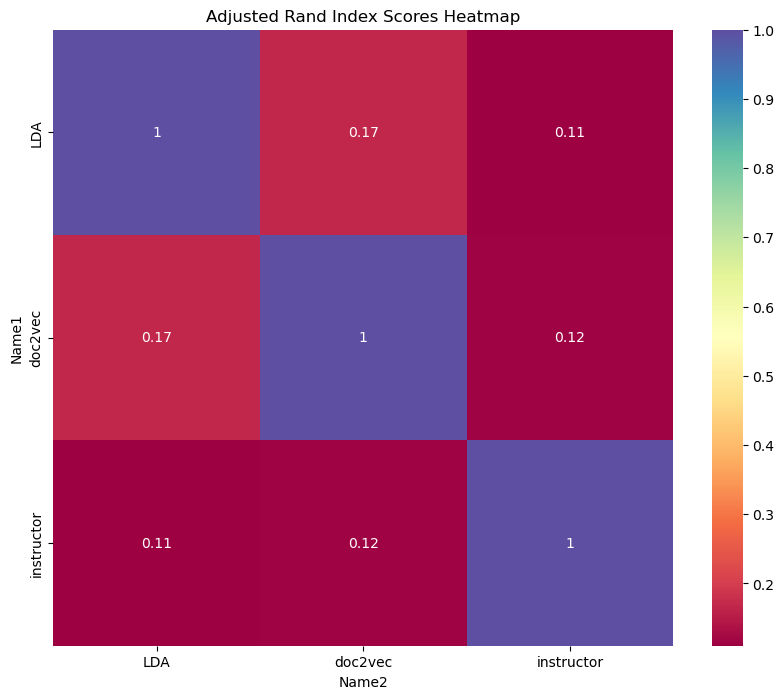

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pivot the results_df to create a matrix
matrix_df = results_df.pivot(index="Name1", columns="Name2", values="Rand index")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_df, annot=True, cmap="Spectral", cbar=True)
plt.title("Adjusted Rand Index Scores Heatmap")
plt.show()

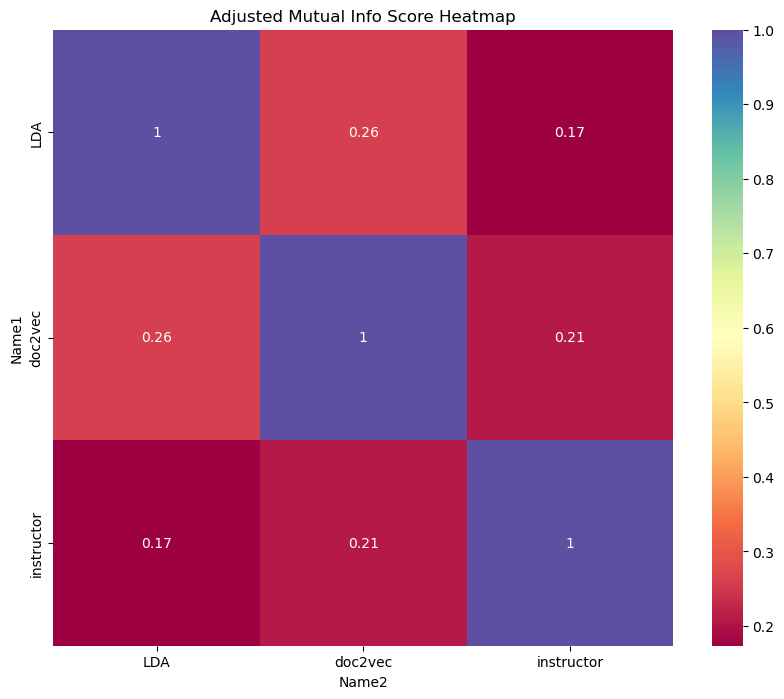

In [9]:
# Pivot the results_df to create a matrix for Adjusted Mutual Info Score
ami_matrix_df = results_df.pivot(index="Name1", columns="Name2", values="Adjusted Mutual Info Score")

# Create a heatmap for Adjusted Mutual Info Score
plt.figure(figsize=(10, 8))
sns.heatmap(ami_matrix_df, annot=True, cmap="Spectral", cbar=True)
plt.title("Adjusted Mutual Info Score Heatmap")
plt.show()

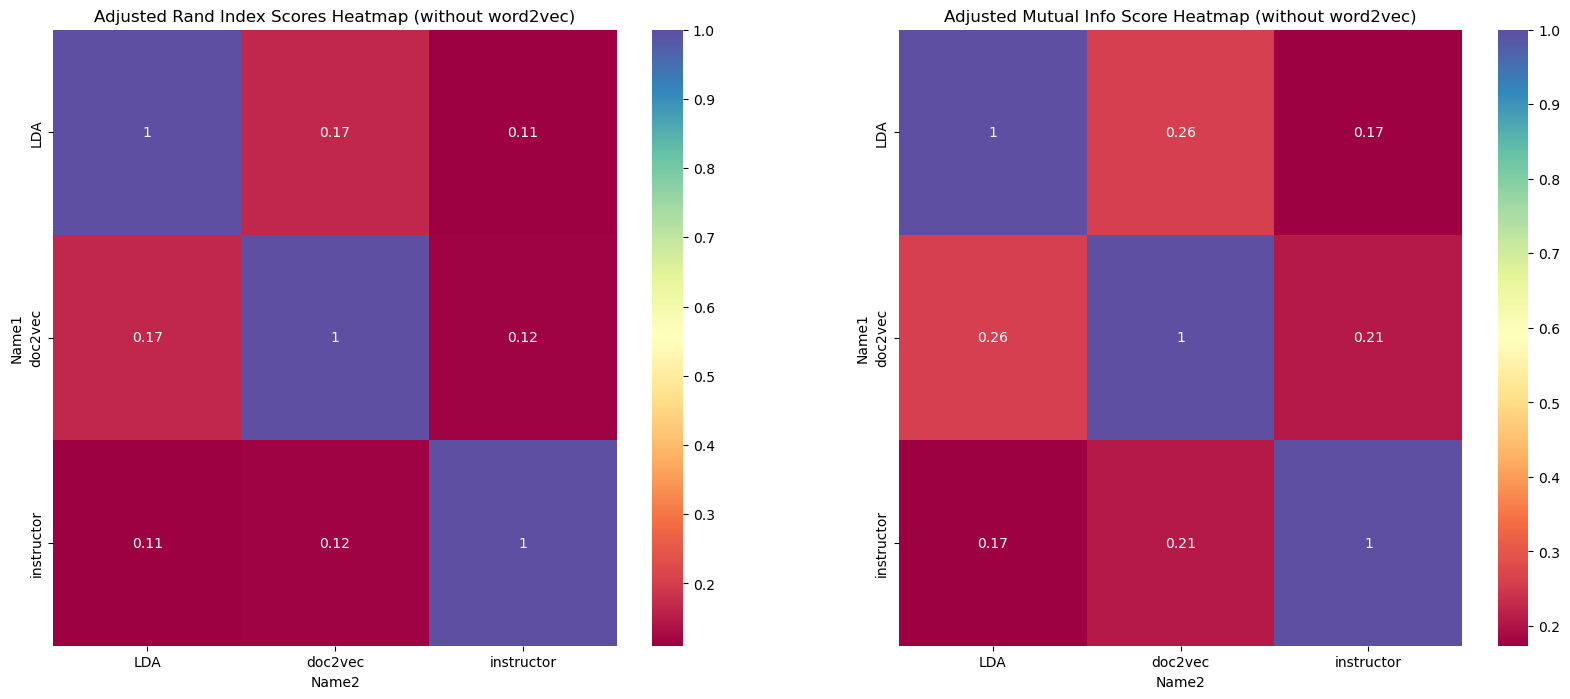

In [11]:

# Create a 2-panel plot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot Adjusted Rand Index Scores Heatmap
sns.heatmap(matrix_df, annot=True, cmap="Spectral", cbar=True, ax=axes[0])
axes[0].set_title("Adjusted Rand Index Scores Heatmap (without word2vec)")

# Plot Adjusted Mutual Info Score Heatmap
sns.heatmap(ami_matrix_df, annot=True, cmap="Spectral", cbar=True, ax=axes[1])
axes[1].set_title("Adjusted Mutual Info Score Heatmap (without word2vec)")


plt.show()

